In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from dcprogs.likelihood import DeterminantEq, find_root_intervals, find_roots, QMatrix
from dcprogs.likelihood.random import qmatrix as random_qmatrix
equation = DeterminantEq(random_qmatrix(), 1e-4)

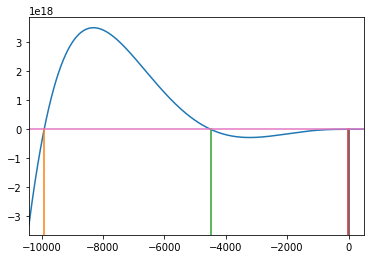

In [4]:
from dcprogs.likelihood import plot_roots
plot_roots(equation, size=25000);

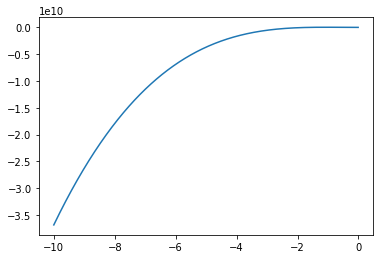

In [5]:
fig, ax = plt.subplots(1,1)
x = np.arange(-10, 0e0, 1e-2)
ax.plot(x, equation(x))

In [6]:
from dcprogs.likelihood import find_root_intervals_brute_force
print(find_root_intervals(equation))
print(find_root_intervals_brute_force(equation, 10))

[((-14870.504977321867, -7435.2524886609335), 1), ((-7435.2524886609335, -3717.6262443304668), 1), ((-1.8152471896144857, -0.9076235948072429), 1), ((-0.05672647467545268, -0.049635665341021096), 1), ((-0.049635665341021096, -0.04254485600658951), 1)]
[((-9920.504977321867, -9910.504977321867), 1), ((-4500.504977321867, -4490.504977321867), 1), ((-10.504977321867045, -0.5049773218670452), 3)]


In [7]:
def trial():
    from numpy import all
    from dcprogs.likelihood import DeterminantEq, find_root_intervals, find_roots, QMatrix
    from dcprogs.likelihood.random import qmatrix as random_qmatrix
    
    while True:
        #try: 
            matrix = random_qmatrix()
            equation = DeterminantEq(matrix, 1e-4)
            return all([r[1] == 1 for r in find_roots(equation)])
        
        #except: continue


print(all([trial() for i in range(500)]))


True


Asymptotic vs Exact for classic Matrix
--------------------------------------

In [8]:
from numpy import array
from dcprogs.likelihood import QMatrix, DeterminantEq, Asymptotes, find_roots
qmatrix = QMatrix( 
           array([[ -3050,        50,  3000,      0,    0 ], 
                  [ 2./3., -1502./3.,     0,    500,    0 ],  
                  [    15,         0, -2065,     50, 2000 ],  
                  [     0,     15000,  4000, -19000,    0 ],  
                  [     0,         0,    10,      0,  -10 ] ]), 2)
equation = DeterminantEq(qmatrix, 1e-4)
roots = find_roots(equation)
asymptotes = Asymptotes(equation, roots)

In [9]:
from dcprogs.likelihood import expm, eig, inv
transitions = qmatrix.transpose()

right = eig(transitions.matrix)[1]
eigenvalues = eig(transitions.matrix)[0]
left = eig(transitions.matrix.T)[1].T

tau = 1e-4
af_factor = np.dot(expm(tau * transitions.ff), transitions.fa)
print(af_factor)
print(np.all(abs(af_factor - np.dot(expm(tau * qmatrix.aa), qmatrix.af)) < 1e-8))
for i, j  in zip(range(5), [0, 1, 2, 4, 3]):
    col = right[:transitions.nopen, i]
    row = inv(right)[i, transitions.nopen:]
    one_way = np.dot(np.outer(col, row), af_factor)
    col = eig(qmatrix.matrix)[1][qmatrix.nopen:, i]
    row = inv(eig(qmatrix.matrix)[1])[i, :qmatrix.nopen]
    other_way = np.dot(np.outer(col, row), np.dot(expm(tau * qmatrix.aa), qmatrix.af))
    print(np.all(abs(one_way - other_way) < 1e-8))
    # print i, " is ok", all(abs(np.dot(outer(col, row), af_factor) - ExactG(transitions, 1e-4).D_af(j)) < 1e-8)
    # print
    # print ExactG(transitions, tau).D_af(i)
    

[[  2.21137053e+03   2.09900610e+00   0.00000000e+00]
 [  1.67920488e-01   4.75583079e+02   0.00000000e+00]]
True
True
True
True
True
True


In [10]:
from dcprogs.likelihood import eig, inv
from numpy import exp
from numpy import diag

right = eig(qmatrix.matrix)[1]
eigenvalues = eig(qmatrix.matrix)[0]
# print eigenvalues, "\n"
left = eig(qmatrix.matrix.T)[1].T
indices = [-2, 0, 1, -1, 2]
print(eig(qmatrix.matrix.T)[0][indices])
print(eigenvalues)
print("Same order left and right: ", all(abs(eigenvalues - eig(qmatrix.matrix.T)[0][indices]) < 1e-8))

for eigenvalue, eigenvector in zip(eigenvalues, right.T): 
    null_mat = qmatrix.matrix - eigenvalue * np.identity(qmatrix.matrix.shape[0])
    print("Is right eig: ", all(abs(np.dot(null_mat, eigenvector)) < 1e-8), eigenvalue)
for eigenvalue, eigenvector in zip(eig(qmatrix.matrix.T)[0], left): 
    null_mat = qmatrix.matrix - eigenvalue * np.identity(qmatrix.matrix.shape[0])
    print("Is left eig: ", all(abs(np.dot(eigenvector, null_mat)) < 1e-8), eigenvalue)

for eigenvalue, eigenvector in zip(eigenvalues, inv(right)): 
    null_mat = qmatrix.matrix - eigenvalue * np.identity(qmatrix.matrix.shape[0])
    print("Is row of inv(right) a left eigenvector: ", all(abs(np.dot(eigenvector, null_mat)) < 1e-8), eigenvalue)
for eigenvalue, eigenvector in zip(eigenvalues, inv(left).T): 
    null_mat = qmatrix.matrix - eigenvalue * np.identity(qmatrix.matrix.shape[0])
    print("Is column of inv(left) a right eigenvector: ", all(abs(np.dot(null_mat, eigenvector)) < 1e-8), eigenvalue)
    

[ -1.94082023e+04  -3.09352724e+03  -2.02211927e+03  -1.01817905e+02
  -3.97221336e-14]
[ -1.94082023e+04  -3.09352724e+03  -2.02211927e+03  -1.01817905e+02
  -3.41740525e-14]
Same order left and right:  True
Is right eig:  True -19408.2022554
Is right eig:  True -3093.52723698
Is right eig:  True -2022.1192695
Is right eig:  True -101.8179048
Is right eig:  True -3.41740524716e-14
Is left eig:  True -3093.52723698
Is left eig:  True -2022.1192695
Is left eig:  True -3.97221336337e-14
Is left eig:  True -19408.2022554
Is left eig:  True -101.8179048
Is row of inv(right) a left eigenvector:  True -19408.2022554
Is row of inv(right) a left eigenvector:  True -3093.52723698
Is row of inv(right) a left eigenvector:  True -2022.1192695
Is row of inv(right) a left eigenvector:  True -101.8179048
Is row of inv(right) a left eigenvector:  True -3.41740524716e-14
Is column of inv(left) a right eigenvector:  False -19408.2022554
Is column of inv(left) a right eigenvector:  False -3093.52723698
I

In [11]:
from numpy.linalg import eig, inv
from dcprogs.likelihood import eig as dceig
from dcprogs.likelihood import inv as dcinv
from numpy import exp
from numpy import diag

Qmatrix2 = qmatrix.transpose()
try:
    right = eig(Qmatrix2.matrix)[1]
    eigenvalues = eig(Qmatrix2.matrix)[0]
    eigenvaluesT = eig(Qmatrix2.matrix.T)[0]
    left = eig(Qmatrix2.matrix.T)[1].T
    invmat = inv(right)
    invmatL = inv(left).T
except: #fallback for longdoubles to eigen
    right = dceig(Qmatrix2.matrix)[1]
    eigenvalues = dceig(Qmatrix2.matrix)[0]
    left = dceig(Qmatrix2.matrix.T)[1].T
    eigenvaluesT = dceig(Qmatrix2.matrix.T)[0]
    invmat = dcinv(right)
    invmatL = dcinv(left).T
    
print("Same order left and right: ", all(abs(eigenvalues - eigenvaluesT) < 1e-8))

for eigenvalue, eigenvector in zip(eigenvalues, right.T): 
    null_mat = Qmatrix2.matrix - eigenvalue * np.identity(Qmatrix2.matrix.shape[0])
    print("Is right eig: ", all(abs(np.dot(null_mat, eigenvector)) < 1e-8), eigenvalue)
for eigenvalue, eigenvector in zip(eigenvalues, left): 
    null_mat = Qmatrix2.matrix - eigenvalue * np.identity(Qmatrix2.matrix.shape[0])
    print("Is left eig: ", all(abs(np.dot(eigenvector, null_mat)) < 1e-8), eigenvalue)

for eigenvalue, eigenvector in zip(eigenvalues, invmat): 
    null_mat = Qmatrix2.matrix - eigenvalue * np.identity(Qmatrix2.matrix.shape[0])
    print("Is row of inv(right) a left eigenvector: ", all(abs(np.dot(eigenvector, null_mat)) < 1e-8), eigenvalue)
for eigenvalue, eigenvector in zip(eigenvalues, invmatL): 
    null_mat = Qmatrix2.matrix - eigenvalue * np.identity(Qmatrix2.matrix.shape[0])
    print("Is column of inv(left) a right eigenvector: ", all(abs(np.dot(null_mat, eigenvector)) < 1e-8), eigenvalue)

Same order left and right:  True
Is right eig:  True -19408.2022554
Is right eig:  True -3093.52723698
Is right eig:  True -2022.1192695
Is right eig:  True -6.87879822226e-14
Is right eig:  True -101.8179048
Is left eig:  True -19408.2022554
Is left eig:  True -3093.52723698
Is left eig:  True -2022.1192695
Is left eig:  True -6.87879822226e-14
Is left eig:  True -101.8179048
Is row of inv(right) a left eigenvector:  True -19408.2022554
Is row of inv(right) a left eigenvector:  True -3093.52723698
Is row of inv(right) a left eigenvector:  True -2022.1192695
Is row of inv(right) a left eigenvector:  True -6.87879822226e-14
Is row of inv(right) a left eigenvector:  True -101.8179048
Is column of inv(left) a right eigenvector:  True -19408.2022554
Is column of inv(left) a right eigenvector:  True -3093.52723698
Is column of inv(left) a right eigenvector:  True -2022.1192695
Is column of inv(left) a right eigenvector:  True -6.87879822226e-14
Is column of inv(left) a right eigenvector:  T

In [12]:
from numpy import array
from dcprogs.likelihood import QMatrix, DeterminantEq, Asymptotes, find_roots, ExactSurvivor
qmatrix = QMatrix( 
           array([[ -3050,        50,  3000,      0,    0 ], 
                  [ 2./3., -1502./3.,     0,    500,    0 ],  
                  [    15,         0, -2065,     50, 2000 ],  
                  [     0,     15000,  4000, -19000,    0 ],  
                  [     0,         0,    10,      0,  -10 ] ]), 2)

transitions = qmatrix.transpose()
tau = 1e-4
exact = ExactSurvivor(transitions, tau)
equation = DeterminantEq(transitions, tau)
roots = find_roots(equation)
approx = Asymptotes(equation, roots)
try:
    eigenvalues = eig(-transitions.matrix)[0]
except:
    eigenvalues = dceig(-transitions.matrix)[0]

def C_i10(i): 
    from numpy import zeros
    result = zeros((transitions.nopen, transitions.nopen), dtype='float64')
    for j in range(transitions.matrix.shape[0]):
        if i == j: continue
        result += np.dot(exact.D_af(i), exact.recursion_af(j, 0, 0)) / (eigenvalues[j] - eigenvalues[i])
        result -= np.dot(exact.D_af(j), exact.recursion_af(i, 0, 0)) / (eigenvalues[i] - eigenvalues[j])
    return result
    
def C_i20(i): 
    from numpy import zeros
    result = zeros((transitions.nopen, transitions.nopen), dtype='float64')
    for j in range(transitions.matrix.shape[0]):
        if i == j: continue
        result += ( np.dot(exact.D_af(i), exact.recursion_af(j, 1, 0)) 
                    + np.dot(exact.D_af(j), exact.recursion_af(i, 1, 0)) ) / (eigenvalues[j] - eigenvalues[i])
        result += ( np.dot(exact.D_af(i), exact.recursion_af(j, 1, 1)) 
                    - np.dot(exact.D_af(j), exact.recursion_af(i, 1, 1)) ) / (eigenvalues[j] - eigenvalues[i])**2
    return result

def C_i21(i): 
    result = np.dot(exact.D_af(i), exact.recursion_af(i, 1, 0)) 
    for j in range(transitions.matrix.shape[0]):
        if i == j: continue
        result -= np.dot(exact.D_af(j), exact.recursion_af(i, 1, 1)) / (eigenvalues[i] - eigenvalues[j])
    return result

def C_i22(i): return np.dot(exact.D_af(i), exact.recursion_af(i, 1, 1)) * 0.5 

print(np.all([np.all(abs(C_i10(i) - exact.recursion_af(i, 1, 0)) < 1e-8) for i in range(5)]))
print(np.all([np.all(abs(C_i20(i) - exact.recursion_af(i, 2, 0)) < 1e-8) for i in range(5)]))
print(np.all([np.all(abs(C_i21(i) - exact.recursion_af(i, 2, 1)) < 1e-8) for i in range(5)]))
print(np.all([np.all(abs(C_i22(i) - exact.recursion_af(i, 2, 2)) < 1e-8) for i in range(5)]))
    
print(C_i22(0))
print(exact.recursion_af(0, 2, 2))
#print np.dot(exact.D_af(1) * exact.recursion_af(1, 1, 1)

False
False
False
True
[[  4.44037679e+01  -1.92479231e+02  -4.57813227e+00]
 [ -1.53983385e+04   6.67479474e+04   1.58760470e+03]
 [ -2.28906614e-02   9.92252936e-02   2.36008070e-03]]
[[  4.44037679e+01  -1.92479231e+02  -4.57813227e+00]
 [ -1.53983385e+04   6.67479474e+04   1.58760470e+03]
 [ -2.28906614e-02   9.92252936e-02   2.36008070e-03]]
